<p align="center">
  <img src="../datasafari-logo-primary.png" width="300">
</p>

---

# Exploratory Data Analysis and Visualization

## Session Objective
Learn to summarize and visualize datasets to uncover patterns and distributions. In this session you will compute key statistics and create plots (histograms, boxplots, bar/pie charts, scatterplots, heatmaps) to identify trends, outliers, and relationships in real data.

<details>
<summary>What do you think when you hear EDA</summary>

- Exploratory Data Analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often with visualization. 
- For example, as an analyst working with Tanzanian financial data, you might first compute averages and medians of incomes to understand “typical” values, and then plot histograms or boxplots to see how income is distributed. 
- This helps identify patterns, spot anomalies or outliers, and reveal relationships among variables. Throughout this session, you will focus on practical data science applications in Python (Pandas, Matplotlib, Seaborn).
</details>


---

## 🧮 Univariate Statistics (Summary Measures) (30 minutes)

**Scenario:** Imagine you work at a Tanzanian microfinance NGO. Before making decisions, you need to know the “typical” loan size and how much customer incomes vary.

<details>
<summary>What is the measure of central tendency? recall you O-level statistics concepts</summary>

- The **univariate statistical measures** (mean, median, mode, variance, standard deviation) describe the **center** and **spread** of a single variable’s values. 
- The **mean** (average) sums all values and divides by count. 
- The **median** is the middle value that splits the sorted data in half (it is not influenced by extreme values). 
- The **mode** is the most frequent value. 
- **Variance** and **standard deviation** quantify spread: standard deviation measures the typical distance of data points from the mean. Together, these summarize a numeric field.
</details>

*From above scenario, sumulate the and creat Pandas DataFrame the find*:
   - Mean age
   - Median age
   - Mode gender
   - Income standard deviation

In [ ]:
import pandas as pd

# Example dataset of 20 customers (synthetic financial data)
# Define the dataset in a dictionary
data = {
    'Age':       [56, 46, 32, 25, 38, 56, 36, 40, 28, 28, 41, 53, 57, 41, 20, 39, 19, 41, 47, 55],
    'Income':    [71936, 73081, 13413, 59052, 46234, 47542, 27855, 72305, 49633, 55333, 
                  56255, 62487, 45599, 49552, 51427, 59970, 47897, 49502, 38764, 38324],
    'Gender':    ['Female','Male','Female','Male','Female','Male','Male','Female','Male','Female',
                  'Female','Female','Female','Female','Female','Female','Female','Female','Female','Female'],
    'LoanAmount':[1500, 4798,  161, 4297, 1981,  995, 4911, 3342, 4551, 3798, 
                  1275, 1016,  337,  878, 1076, 4887, 3993, 4859,  379,  492],
    'Region':    ['Urban','Urban','Urban','Urban','Urban','Urban','Urban','Urban','Rural','Urban',
                  'Rural','Rural','Rural','Urban','Urban','Urban','Urban','Rural','Urban','Urban']
}

In [2]:
# Create DataFrame from dIctionary
df = pd.DataFrame(data)

In [3]:
# Check the First few rows
df.head(10)

,Age,Income,Gender,LoanAmount,Region
0,56,71936,Female,1500,Urban
1,46,73081,Male,4798,Urban
2,32,13413,Female,161,Urban
3,25,59052,Male,4297,Urban
4,38,46234,Female,1981,Urban
5,56,47542,Male,995,Urban
6,36,27855,Male,4911,Urban
7,40,72305,Female,3342,Urban
8,28,49633,Male,4551,Rural
9,28,55333,Female,3798,Urban


*Here you assume that the data is crean and in correct format as you did in **Session 3***
- Compute basic statistics

In [4]:
# Compute Mean
print("Mean Age:", df['Age'].mean())

Mean Age: 39.9


In [5]:
# Compute Median 
print("Median Age:", df['Age'].median())

Median Age: 40.5


In [6]:
# Compute Mode
print("Mode Gender:", df['Gender'].mode()[0])

Mode Gender: Female


In [7]:
# Compute Standard Deviation
print("Income Std Dev:", df['Income'].std(), "\n")

Income Std Dev: 14584.467936725303 



In [9]:
# Compute basic statistics for numerical columns using describe()
df[['Age','Income','LoanAmount']].describe().round(1)

,Age,Income,LoanAmount
count,20.0,20.0,20.0
mean,39.9,50808.0,2476.3
std,12.0,14584.5,1849.3
min,19.0,13413.0,161.0
25%,31.0,46075.2,965.8
50%,40.5,49592.5,1740.5
75%,48.5,59281.5,4360.5
max,57.0,73081.0,4911.0


- By using Pandas, we compute these easily. Some of the common Pandas functions such as 
  - `.mean()`
  - `.median()`
  - `.mode()`
  - `.std()` give quick summaries. 
- In the code above, we see the mean age, median age, and most common gender; the output of `df.describe()` lists count, mean, std, min, quartiles, and max for each numeric column. 
- These statistics tell us, for instance, if the income distribution is tightly clustered or widely spread. The median is especially useful because it resists extreme values.

**Key point:** A large difference between mean and median indicates **skew** (asymmetric data). A high std dev means data are more spread out.

### Practical Activity
- Using the cleaned `soil_quality` data, compute summary stats for key fields:

  1. Calculate mean, median, mode, variance, std dev for numerical features (use `.describe()` or Pandas functions).
  2. Interpret the results: Are values skewed? Which feature has the highest variance?
  3. Write your observations in Markdown.

In [10]:
# Load the soil quality dataset
import pandas as pd
import numpy as np

In [18]:
# Load the dataset
df_soil = pd.read_csv('../Data/soil_quality_cleaned.csv')

In [19]:
# Display first few rows to understand the data
print("First few rows of soil quality data:")
df_soil.head()

First few rows of soil quality data:


,Location,Year,pH,Nitrogen
0,lake3,2020,7.265471,3.212081
1,lake3,2022,7.035864,3.212081
2,lake1,2020,7.464235,3.212081
3,lake3,2022,7.055830,3.914040
4,lake4,2021,7.392931,3.212081


In [20]:
# Display dataset shape and data types
print("\nDataset shape:", df_soil.shape)
print("\nData types:")
print(df_soil.dtypes)


Dataset shape: (50, 4)

Data types:
Location     object
Year          int64
pH          float64
Nitrogen    float64
dtype: object


In [ ]:
# Using df.describe() for quick overview
summary_stats = df_soil.describe().round(2)
print("\nBasic Statistics (using describe()):")
summary_stats


Basic Statistics (using describe()):


,Year,pH,Nitrogen
count,50.00,50.00,50.00
mean,2021.16,7.06,3.21
std,0.77,0.25,0.40
min,2020.00,6.52,2.51
25%,2021.00,6.93,2.87
50%,2021.00,7.06,3.21
75%,2022.00,7.22,3.49
max,2022.00,7.50,3.91


- Use for-loop to calculate detailed statistic

In [23]:
# Calculate additional statistics
print("\n" + "=" * 60)
print("DETAILED STATISTICS")
print("=" * 60)

for col in df_soil.select_dtypes(include=[np.number]).columns:
    print(f"\n{col}:")
    print(f"  Mean:     {df_soil[col].mean():.2f}")
    print(f"  Median:   {df_soil[col].median():.2f}")
    print(f"  Mode:     {df_soil[col].mode().values[0] if len(df_soil[col].mode()) > 0 else 'N/A'}")
    print(f"  Variance: {df_soil[col].var():.2f}")
    print(f"  Std Dev:  {df_soil[col].std():.2f}")
    print(f"  Min:      {df_soil[col].min():.2f}")
    print(f"  Max:      {df_soil[col].max():.2f}")


DETAILED STATISTICS

Year:
  Mean:     2021.16
  Median:   2021.00
  Mode:     2021
  Variance: 0.59
  Std Dev:  0.77
  Min:      2020.00
  Max:      2022.00

pH:
  Mean:     7.06
  Median:   7.06
  Mode:     7.055829864421082
  Variance: 0.06
  Std Dev:  0.25
  Min:      6.52
  Max:      7.50

Nitrogen:
  Mean:     3.21
  Median:   3.21
  Mode:     3.2120814941425464
  Variance: 0.16
  Std Dev:  0.40
  Min:      2.51
  Max:      3.91


In [ ]:
# Step 3: Identify skewness and variance
# Scipy is a useful library for statistical computations
# Install it via %pip install scipy if not already installed
from scipy import stats 


numeric_cols = df_soil.select_dtypes(include=[np.number]).columns
variance_dict = {}

for col in numeric_cols:
    skewness = stats.skew(df_soil[col].dropna())
    variance = df_soil[col].var()
    variance_dict[col] = variance
    
    print(f"\n{col}:")
    print(f"  Skewness: {skewness:.3f}", end="")
    
    if abs(skewness) < 0.5:
        print(" (Fairly symmetric)")
    elif skewness > 0:
        print(" (Right-skewed - tail on right)")
    else:
        print(" (Left-skewed - tail on left)")
    
    print(f"  Variance: {variance:.2f}")

Note: you may need to restart the kernel to use updated packages.

SKEWNESS AND VARIANCE ANALYSIS

Year:
  Skewness: -0.275 (Fairly symmetric)
  Variance: 0.59

pH:
  Skewness: -0.220 (Fairly symmetric)
  Variance: 0.06

Nitrogen:
  Skewness: 0.071 (Fairly symmetric)
  Variance: 0.16


---

## 📈 Distribution Plots (Histogram, KDE, Boxplot) (30 minutes)

**Scenario:** To understand income patterns, you ask: Are most customers earning around a typical value, or is the distribution skewed? Are there outliers?

<details>
<summary>
What is data distribution?
</summary>

## What is Data Distribution?

**Data distribution** describes how values of a variable are spread or arranged across a range. It answers the question: *"How often does each value (or range of values) appear in my dataset?"*

### Key Concepts:

- **Shape**: Is the data symmetric (bell-curve/normal) or skewed (lopsided)?
- **Center**: Where is the middle or peak of the data?
- **Spread**: How wide or narrow is the range of values?
- **Outliers**: Are there extreme values far from the main cluster?

### Common Distributions:

1. **Normal Distribution (Bell Curve)** - Most data points cluster around the mean; symmetric tails on both sides.
2. **Skewed Distribution** - Asymmetric; most values on one side with a tail extending to the other.
3. **Bimodal Distribution** - Two distinct peaks, suggesting two different groups in the data.
4. **Uniform Distribution** - Values spread evenly across the range.

<details>
<summary>
Why is it important to check for data distribution before Model Building
</summary>

## Why Check Data Distribution Before Model Building?

Checking data distribution is **critical** for model success. Here's why:

### **1. Model Assumptions**
- **Linear Regression, Logistic Regression, t-tests** assume data is approximately **normally distributed**.
- If your data violates this assumption, predictions and statistical inferences become unreliable.
- Example: If loan amounts are heavily right-skewed (few very large loans), a linear regression model may overestimate typical loan values.

### **2. Outlier Detection & Treatment**
- Distribution analysis reveals **extreme values** (outliers) that can distort model coefficients.
- Boxplots and histograms make outliers immediately visible.
- Example: One billionaire's income in a dataset of middle-class earners will skew all statistics and mislead the model about "typical" income.

### **3. Feature Scaling & Normalization**
- Skewed data causes problems when scaling features for neural networks, KNN, or K-means clustering.
- **Standard scaling (z-score)** and **min-max scaling** assume roughly normal data; they perform poorly on skewed distributions.
- Result: Gradient descent converges slowly, or the model gives excessive weight to outliers.

### **4. Class Imbalance (Classification Problems)**
- If your target variable is skewed (e.g., 95% "No Fraud" vs. 5% "Fraud"), the model may simply predict the majority class.
- A model that predicts "No Fraud" for everything achieves 95% accuracy but catches **zero fraud cases**!
- You must detect this imbalance early and apply techniques like **SMOTE, class weights, or stratified sampling**.

### **5. Predictive Power**
- Skewed features have less predictive power. A feature where 90% of values are identical provides little information to distinguish between cases.
- Example: If a soil quality feature is mostly 5.0 (skewed), it won't help predict crop yield.

### **6. Model Interpretability**
- Skewed distributions can lead to counterintuitive model coefficients and predictions.
- Example: A relationship you think is linear may actually be logarithmic because the underlying data is log-normally distributed.
</details>

<details>
<summary>
What to do if the data is not Normaly Distributed?
</summary>

## Real-World Example (Tanzanian Soil Quality Data):

**Scenario:** You have soil nutrient data where:
- Nitrogen: normally distributed ✅ (good for linear models)
- Phosphorus: right-skewed ❌ (few soils very high in phosphorus)
- pH: uniform ⚠️ (no clear pattern; may need different algorithm)

**Actions:**
1. Apply log transformation to Phosphorus before modeling.
2. Use robust algorithms (tree-based models, median-based metrics) for skewed features.
3. Visualize all distributions with histograms/boxplots first.
4. Document your findings for stakeholders.

</details>
</details>

**Technical:** A **histogram** shows the frequency (count) of data points in numerical bins. It is the most common way to visualize a data distribution. (Unlike a bar chart for categories, histogram bars touch each other and represent ranges of values.) A **Kernel Density Estimate (KDE)** plot is a smoothed version of the histogram. A **boxplot** (box-and-whisker) shows the median, quartiles, and outliers: it extends from the first quartile (Q1) to the third quartile (Q3) with a line at the median, and whiskers up to 1.5× the interquartile range; points beyond are outliers. Boxplots make it easy to spot asymmetry and outliers.

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 11.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 19.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 18.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 22.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------- ----------- 5.0/7.0 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 17.2 MB/s eta 0:00:00

   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   --------------- ------------------------ 3/8 [fonttools]
   --------------- ------------------------ 3/8 [fonttools]
   --------------- --------------------

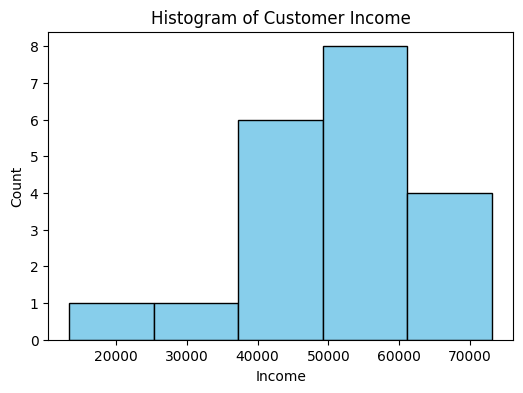

C:\Users\jdmay\AppData\Local\Temp\ipykernel_6320\667073435.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Income'], shade=True, color='orange')


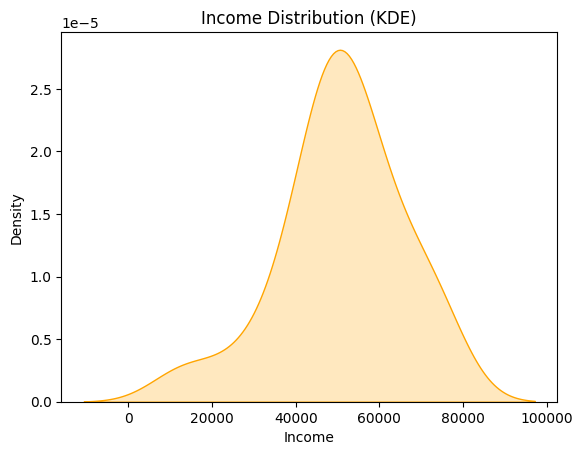

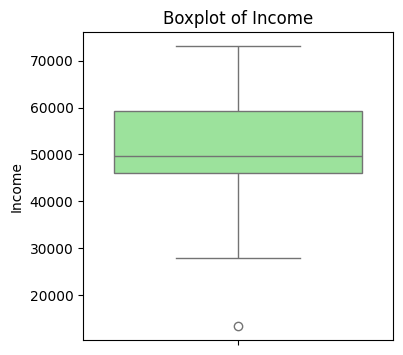

In [29]:
%pip install matplotlib seaborn


import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Income
plt.figure(figsize=(6,4))
plt.hist(df['Income'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Customer Income')
plt.xlabel('Income'); plt.ylabel('Count')
plt.show()

# KDE plot of Income
sns.kdeplot(df['Income'], shade=True, color='orange')
plt.title('Income Distribution (KDE)')
plt.xlabel('Income'); plt.ylabel('Density')
plt.show()

# Boxplot of Income
plt.figure(figsize=(4,4))
sns.boxplot(y=df['Income'], color='lightgreen')
plt.title('Boxplot of Income')
plt.ylabel('Income')
plt.show()

In code, we first plot a histogram of incomes (`plt.hist`). The KDE (`sns.kdeplot`) overlays a smooth density curve, highlighting modes or skew. The boxplot (`sns.boxplot`) reveals the median line inside the box (the 50% range) and any fliers beyond whiskers. By inspecting these:

* If the histogram is skewed right (tail on high end), the mean > median.
* Boxplot outliers appear as dots outside whiskers.
* A bimodal distribution would show two peaks in the KDE.

### Practical Activity
1. Use `plt.hist()` or `sns.histplot()` to plot histograms of at least two numerical columns (e.g. income and loan amount).
2. Add titles/labels to make charts clear (use `plt.title`, `plt.xlabel`, `plt.ylabel`).
3. Create boxplots (`sns.boxplot()`) for the same columns.
4. Examine the plots: Are there skewed distributions or outliers? Write your interpretations in Markdown.

---

## 🥧 Categorical Data Visualization (Counts, Bar Charts, Pie Charts) (20 minutes)

**Scenario:** You have categorical fields like “Region” (Urban/Rural) or “Gender”. You want to see how many customers fall into each category.

**Technical:** For categorical variables, we count frequencies. In Pandas, `df['Region'].value_counts()` gives counts per category. We often visualize these with a **bar chart**, where each category has a bar height proportional to its frequency. The bars should be equally spaced and labeled; their lengths reflect category counts. A **pie chart** is another option, showing proportions of a whole (though bar charts are usually clearer).

In [ ]:
# Bar chart of Gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(4,4))
plt.bar(gender_counts.index, gender_counts.values, color=['pink','lightblue'])
plt.title('Count by Gender')
plt.xlabel('Gender'); plt.ylabel('Count')
plt.show()

# Pie chart of Region
region_counts = df['Region'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Region Distribution')
plt.axis('equal');  # keep as circle
plt.show()

Above, we made a bar chart of Gender counts and a pie chart of Region. Bar charts are preferable for categorical frequencies: “The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The length of each bar is proportional to the frequency of that category.” (Pie charts show slices of a circle.) You can see which category is largest and compare easily.

### Practical Activity
1. For each categorical feature in your data, compute `value_counts()` and make a bar chart (`plt.bar` or `sns.countplot`).
2. Optionally, create a pie chart with `plt.pie()`.
3. Check which categories dominate and if any category is rare. Summarize findings in Markdown (e.g. “Urban customers make up 85% of the dataset, so services should focus there.”).

---

## 🔍 Bivariate Analysis (Scatterplots and Correlation) (25 minutes)

**Scenario:** To explore relationships, you examine pairs of numeric features. For example, is age related to loan amount? Does higher income correspond to larger loans?

**Technical:** A **scatter plot** shows one variable on the x-axis and another on the y-axis, with each point representing a record. Patterns (upward trend, cluster, none) may indicate **correlation**. We quantify this with the **Pearson correlation coefficient (r)**, which ranges from –1 to +1. A value near +1 means a strong positive linear relationship; near 0 means no linear correlation. In Python, `df.corr()` computes pairwise correlations for numeric columns.

In [ ]:
# Scatter plot: Income vs. LoanAmount
plt.figure(figsize=(6,4))
plt.scatter(df['Income'], df['LoanAmount'], color='purple', alpha=0.7)
plt.title('Income vs. Loan Amount')
plt.xlabel('Income'); plt.ylabel('Loan Amount')
plt.show()

# Compute correlation
corr_matrix = df[['Age','Income','LoanAmount']].corr()
print(corr_matrix)

The scatter plot (`plt.scatter`) lets you visually assess if points cluster along a line. The printed correlation matrix shows numbers like: r(Income, LoanAmount) ≈ 0.31, indicating a moderate positive correlation; r(Age, LoanAmount) might be negative. Remember: r is between –1 and 1, measuring strength and direction of linear relation. A correlation of 0.7 or above is often considered strong; below 0.3 is weak.

* If points lie close to an upward-sloping line, r is positive (strong if near 1).
* If they form no clear pattern, r is near 0.
* A downward trend yields a negative r.

### Practical Activity
1. Choose two numeric variables (e.g. Income and LoanAmount) and create a scatter plot (`sns.scatterplot` or `plt.scatter`).
2. Compute their correlation with `df.corr()`.
3. Interpret: “We found r = X, indicating [strong/weak/none] [positive/negative] correlation.”
4. Repeat for another pair (e.g. Age vs. Income). Record insights in Markdown.

---

## 🌡️ Correlation Heatmap (15 minutes)

**Scenario:** You have many numerical features and want an overview of all pairwise correlations to spot strong relationships.

**Technical:** A **heatmap** is a grid where cell colors represent values, useful for visualizing a correlation matrix. We will plot the correlation matrix from `df.corr()` using Seaborn.

In [ ]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap above (with values annotated) quickly highlights high correlations: dark red (near +1) or dark blue (near –1). For example, if Income and LoanAmount have a moderate positive correlation (~0.31), their cell will show ~0.31. Blocks of color show groups of features that move together. This multivariate view helps identify unexpected relationships or redundancy among features.

### Practical Activity
1. Compute a correlation matrix for all numeric features (`df.corr()`).
2. Plot it with `sns.heatmap(..., annot=True)`.
3. Look for the highest and lowest correlations (largest magnitude values) and write down hypotheses (e.g. “Maybe younger customers take smaller loans because age and loan have negative correlation.”).

---

## 💻 Mini Project: EDA of a Household Dataset (45 minutes)

Now apply what you’ve learned in a guided mini-project. Context: You have a real dataset (e.g. a Tanzanian household survey or microfinance customer data). Follow these steps:

1. **Load the data** into a Pandas DataFrame (e.g. a CSV file from Zindi/Humdata).
2. **Compute summary statistics:** For each numerical column, find mean, median, mode, and standard deviation. Interpret these statistics.
3. **Visualize distributions:** Plot histograms (with appropriate binning) and boxplots for at least two numeric variables. Comment on their shapes (skewness, modality, outliers).
4. **Analyze categories:** For each categorical column (such as Region, Gender, Product type), create a bar chart of counts. Optionally, a pie chart for one variable. Note the largest categories.
5. **Explore relationships:** Pick two numeric features and plot a scatterplot. Compute their correlation. Repeat for a different pair.
6. **Correlation heatmap:** Generate a heatmap of all numeric-feature correlations. Identify any strong correlations (`|r|>0.5`) and mention what they might imply.
7. **Write observations:** In Markdown cells, summarize the key findings: e.g. which feature has the highest mean, whether income is skewed, any surprising outliers, and how features relate. Use bullet points for clarity.

This mini-project reinforces summarizing data with code and narrative.

---

## 🎓 Capstone Project: Complete EDA (60 minutes)

For your capstone task, perform a comprehensive EDA on a new dataset (for example, download a Tanzanian financial dataset from the provided sources or use a public dataset relevant to economics/health). Break your work into these tasks:

1. **Data Preparation:** Load and inspect the dataset. Handle any missing values if needed.
2. **Univariate Analysis:** Compute all basic statistics (mean, median, mode, std, min, max) for numeric features. Display the results in a table (`df.describe()`).
3. **Distribution Plots:** Create histograms and boxplots for key variables (at least three). Explain in Markdown what each plot tells you (e.g. “The income distribution is right-skewed with a long tail, as most people have lower incomes but a few are very high.”).
4. **Categorical Analysis:** For each categorical variable, present counts in a bar chart. Provide insights (e.g. “60% of respondents are from Urban regions, suggesting urban bias in the data.”).
5. **Bivariate Plots:** For at least two pairs of variables, plot and analyze scatterplots. Compute correlation coefficients for each pair and discuss whether they indicate strong relationships.
6. **Correlation Overview:** Plot a heatmap of the correlation matrix for all numeric features. Highlight any surprising strong correlations or lack thereof.
7. **Narrative Summary:** In well-organized Markdown sections, discuss the overall patterns you discovered. Point out any outliers or anomalies (e.g. “One outlier with extremely high loan amount was found in Region X”). Suggest possible reasons or next steps (such as deeper data cleaning if anomalies appear).

**Deliverable:** A Jupyter Notebook (with code and Markdown) containing all plots and written analysis. Make sure each visualization is labeled (with `plt.title`, axis labels) and every chart is interpreted in text. This final notebook should stand alone as a complete EDA report.

---
<p align="center">
  <img src="../datasafari-logo-primary.png" width="300">
</p>
